#Hyper tuning

In [ ]:
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define the hyperparameters to tune
    units = trial.suggest_int('units', 16, 256)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    optimizer_name = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'nadam'])
    l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])

    # Define the model
    model = models.Sequential()
    model.add(layers.Dense(units, activation='relu', input_shape=(X_processed.shape[1],),
                           kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.Flatten())
    model.add(layers.Dense(3, activation='softmax'))

    # Define the optimizer
    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)
    else:
        raise ValueError(f"Unsupported optimizer: {optimizer_name}")

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=20, verbose=0)

    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_val)
    y_val_pred_binary = np.argmax(y_val_pred, axis=1)
    accuracy = accuracy_score(y_val, y_val_pred_binary)

    # Return the accuracy as the performance metric
    return accuracy

In [ ]:
# Define the study name and storage location
study_name = "NN2"
storage = "sqlite:///NN2.db"
study = optuna.create_study(direction='maximize', study_name=study_name, storage=storage)
study.optimize(objective, n_trials=50)

# Get the best hyperparameters and their performance
best_params = study.best_params
best_accuracy = study.best_value

print("Best Hyperparameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

print(f"Best Accuracy: {best_accuracy:.2f}")

[I 2024-04-08 17:13:46,882] A new study created in RDB with name: NN2
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 1s 3ms/step


[I 2024-04-08 17:14:48,906] Trial 0 finished with value: 0.7177563998043371 and parameters: {'units': 110, 'learning_rate': 0.09149776670830648, 'optimizer': 'adam', 'l2_reg': 0.008241573663393342, 'batch_size': 64}. Best is trial 0 with value: 0.7177563998043371.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:15:09,560] Trial 1 finished with value: 0.7572150660361976 and parameters: {'units': 131, 'learning_rate': 0.0028406030692197165, 'optimizer': 'nadam', 'l2_reg': 5.635450267366821e-05, 'batch_size': 128}. Best is trial 1 with value: 0.7572150660361976.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:17:33,494] Trial 2 finished with value: 0.7588455894342084 and parameters: {'units': 168, 'learning_rate': 4.235127523007857e-05, 'optimizer': 'nadam', 'l2_reg': 4.6218550350501124e-05, 'batch_size': 16}. Best is trial 2 with value: 0.7588455894342084.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:17:51,622] Trial 3 finished with value: 0.7438447741725094 and parameters: {'units': 191, 'learning_rate': 2.543974936830816e-05, 'optimizer': 'rmsprop', 'l2_reg': 3.1722351841841224e-05, 'batch_size': 128}. Best is trial 2 with value: 0.7588455894342084.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 1s 2ms/step


[I 2024-04-08 17:18:34,100] Trial 4 finished with value: 0.7572150660361976 and parameters: {'units': 98, 'learning_rate': 8.946887432702483e-05, 'optimizer': 'rmsprop', 'l2_reg': 8.372899329259329e-05, 'batch_size': 64}. Best is trial 2 with value: 0.7588455894342084.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:19:33,140] Trial 5 finished with value: 0.7459644545899233 and parameters: {'units': 55, 'learning_rate': 0.01468061014951079, 'optimizer': 'adam', 'l2_reg': 0.004043461230851072, 'batch_size': 32}. Best is trial 2 with value: 0.7588455894342084.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 2ms/step


[I 2024-04-08 17:19:55,082] Trial 6 finished with value: 0.7200391325615523 and parameters: {'units': 255, 'learning_rate': 0.021509149929783016, 'optimizer': 'rmsprop', 'l2_reg': 0.014915888637792616, 'batch_size': 128}. Best is trial 2 with value: 0.7588455894342084.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 2ms/step


[I 2024-04-08 17:20:16,785] Trial 7 finished with value: 0.7542801239197783 and parameters: {'units': 201, 'learning_rate': 0.0038992286816095533, 'optimizer': 'rmsprop', 'l2_reg': 0.013553436648159995, 'batch_size': 128}. Best is trial 2 with value: 0.7588455894342084.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:20:39,261] Trial 8 finished with value: 0.7498777107451492 and parameters: {'units': 38, 'learning_rate': 0.009877014959293643, 'optimizer': 'nadam', 'l2_reg': 0.0009121017532839072, 'batch_size': 128}. Best is trial 2 with value: 0.7588455894342084.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:20:58,972] Trial 9 finished with value: 0.7547692809391815 and parameters: {'units': 161, 'learning_rate': 0.0025256761831357185, 'optimizer': 'rmsprop', 'l2_reg': 0.006346448734799141, 'batch_size': 128}. Best is trial 2 with value: 0.7588455894342084.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:23:22,656] Trial 10 finished with value: 0.7621066362302299 and parameters: {'units': 230, 'learning_rate': 0.00016934461504087547, 'optimizer': 'nadam', 'l2_reg': 1.0691921990180676e-05, 'batch_size': 16}. Best is trial 10 with value: 0.7621066362302299.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:25:46,584] Trial 11 finished with value: 0.7645524213272461 and parameters: {'units': 249, 'learning_rate': 0.00021603886731651214, 'optimizer': 'nadam', 'l2_reg': 1.7271327788356524e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 2ms/step


[I 2024-04-08 17:28:08,697] Trial 12 finished with value: 0.7598239034730149 and parameters: {'units': 254, 'learning_rate': 0.00029057611873477046, 'optimizer': 'nadam', 'l2_reg': 1.3474917783975592e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 2ms/step


[I 2024-04-08 17:30:33,114] Trial 13 finished with value: 0.7608022175118213 and parameters: {'units': 219, 'learning_rate': 0.0003865173716969192, 'optimizer': 'nadam', 'l2_reg': 0.0003446501513063696, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:32:47,177] Trial 14 finished with value: 0.7096037828142834 and parameters: {'units': 227, 'learning_rate': 1.0585333349636919e-05, 'optimizer': 'nadam', 'l2_reg': 0.0961683083413642, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:35:10,741] Trial 15 finished with value: 0.7562367519973912 and parameters: {'units': 230, 'learning_rate': 0.0002602623310957499, 'optimizer': 'nadam', 'l2_reg': 1.1416840360359303e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:36:33,951] Trial 16 finished with value: 0.7608022175118213 and parameters: {'units': 182, 'learning_rate': 0.0007777066585751292, 'optimizer': 'adam', 'l2_reg': 0.00021750629185698675, 'batch_size': 32}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:38:57,816] Trial 17 finished with value: 0.7608022175118213 and parameters: {'units': 146, 'learning_rate': 9.54620469818523e-05, 'optimizer': 'nadam', 'l2_reg': 0.00016562958103012132, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 2ms/step


[I 2024-04-08 17:41:09,074] Trial 18 finished with value: 0.7640632643078428 and parameters: {'units': 218, 'learning_rate': 9.569089727749003e-05, 'optimizer': 'nadam', 'l2_reg': 2.1304069040682213e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 1s 2ms/step


[I 2024-04-08 17:43:33,041] Trial 19 finished with value: 0.7594977987934127 and parameters: {'units': 206, 'learning_rate': 0.0012378636909772351, 'optimizer': 'nadam', 'l2_reg': 0.0007463369787260705, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:44:04,008] Trial 20 finished with value: 0.7546062285993804 and parameters: {'units': 79, 'learning_rate': 3.58117026780673e-05, 'optimizer': 'adam', 'l2_reg': 3.1720746365128204e-05, 'batch_size': 64}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 2ms/step


[I 2024-04-08 17:46:27,738] Trial 21 finished with value: 0.7596608511332138 and parameters: {'units': 240, 'learning_rate': 0.00012713769937419412, 'optimizer': 'nadam', 'l2_reg': 1.1323358977996927e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:48:51,328] Trial 22 finished with value: 0.7591716941138106 and parameters: {'units': 213, 'learning_rate': 0.0006643657309907687, 'optimizer': 'nadam', 'l2_reg': 2.1334525158027493e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:51:00,088] Trial 23 finished with value: 0.7640632643078428 and parameters: {'units': 241, 'learning_rate': 0.00017019171867697038, 'optimizer': 'nadam', 'l2_reg': 9.878164228117513e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 1s 2ms/step


[I 2024-04-08 17:52:08,549] Trial 24 finished with value: 0.7614544268710256 and parameters: {'units': 247, 'learning_rate': 6.06812992512909e-05, 'optimizer': 'nadam', 'l2_reg': 8.317861107994601e-05, 'batch_size': 32}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:54:32,278] Trial 25 finished with value: 0.7603130604924181 and parameters: {'units': 173, 'learning_rate': 0.0003607713627727203, 'optimizer': 'nadam', 'l2_reg': 0.00013118344345581433, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:56:37,729] Trial 26 finished with value: 0.7546062285993804 and parameters: {'units': 203, 'learning_rate': 1.385654612422536e-05, 'optimizer': 'nadam', 'l2_reg': 0.00043613058888509733, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 17:58:41,618] Trial 27 finished with value: 0.7369965759008642 and parameters: {'units': 16, 'learning_rate': 2.0930515816385567e-05, 'optimizer': 'nadam', 'l2_reg': 0.002172273087826754, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:00:52,613] Trial 28 finished with value: 0.7608022175118213 and parameters: {'units': 237, 'learning_rate': 0.0001889019405722125, 'optimizer': 'adam', 'l2_reg': 2.4085359439942647e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:01:30,343] Trial 29 finished with value: 0.7366704712212621 and parameters: {'units': 141, 'learning_rate': 0.05199092951662967, 'optimizer': 'nadam', 'l2_reg': 6.84892996871008e-05, 'batch_size': 64}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 2ms/step


[I 2024-04-08 18:02:37,401] Trial 30 finished with value: 0.7585194847546062 and parameters: {'units': 188, 'learning_rate': 6.195550579815741e-05, 'optimizer': 'adam', 'l2_reg': 0.00010853136431985881, 'batch_size': 32}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:04:47,868] Trial 31 finished with value: 0.758030327735203 and parameters: {'units': 227, 'learning_rate': 0.0001418990429353474, 'optimizer': 'nadam', 'l2_reg': 1.9875799203237893e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 2ms/step


[I 2024-04-08 18:07:11,702] Trial 32 finished with value: 0.7591716941138106 and parameters: {'units': 242, 'learning_rate': 0.0005359702099532914, 'optimizer': 'nadam', 'l2_reg': 4.663981028338213e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:09:14,826] Trial 33 finished with value: 0.7612913745312245 and parameters: {'units': 119, 'learning_rate': 0.0011386485312456392, 'optimizer': 'nadam', 'l2_reg': 1.0134773169390443e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 2ms/step


[I 2024-04-08 18:11:16,564] Trial 34 finished with value: 0.7596608511332138 and parameters: {'units': 224, 'learning_rate': 0.00019110686350746727, 'optimizer': 'nadam', 'l2_reg': 4.381499116852186e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:12:01,355] Trial 35 finished with value: 0.758030327735203 and parameters: {'units': 255, 'learning_rate': 5.9027669471975824e-05, 'optimizer': 'nadam', 'l2_reg': 1.9211771212830742e-05, 'batch_size': 64}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:14:25,027] Trial 36 finished with value: 0.7591716941138106 and parameters: {'units': 216, 'learning_rate': 3.151085514294912e-05, 'optimizer': 'nadam', 'l2_reg': 3.523188411806743e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:16:18,713] Trial 37 finished with value: 0.760150008152617 and parameters: {'units': 156, 'learning_rate': 9.853504225741922e-05, 'optimizer': 'rmsprop', 'l2_reg': 2.0759969490739874e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:18:42,567] Trial 38 finished with value: 0.7560736996575901 and parameters: {'units': 194, 'learning_rate': 0.002026624256951248, 'optimizer': 'nadam', 'l2_reg': 5.978984548453999e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:19:13,343] Trial 39 finished with value: 0.7627588455894342 and parameters: {'units': 242, 'learning_rate': 0.00017592606470739555, 'optimizer': 'rmsprop', 'l2_reg': 0.000265146436558666, 'batch_size': 64}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:19:43,688] Trial 40 finished with value: 0.7617805315506277 and parameters: {'units': 245, 'learning_rate': 0.0005030506077568816, 'optimizer': 'rmsprop', 'l2_reg': 0.0002661016968505654, 'batch_size': 64}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 2ms/step


[I 2024-04-08 18:20:26,124] Trial 41 finished with value: 0.7568889613565954 and parameters: {'units': 234, 'learning_rate': 0.00018550234385456062, 'optimizer': 'rmsprop', 'l2_reg': 0.0005258821673628254, 'batch_size': 64}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:20:57,095] Trial 42 finished with value: 0.7570520136963965 and parameters: {'units': 209, 'learning_rate': 5.677629577183086e-05, 'optimizer': 'rmsprop', 'l2_reg': 0.0001071068157985768, 'batch_size': 64}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:21:18,746] Trial 43 finished with value: 0.7621066362302299 and parameters: {'units': 255, 'learning_rate': 0.00028587743503383266, 'optimizer': 'rmsprop', 'l2_reg': 0.0013250100342051432, 'batch_size': 128}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:21:49,684] Trial 44 finished with value: 0.7598239034730149 and parameters: {'units': 219, 'learning_rate': 0.00012095161655666437, 'optimizer': 'rmsprop', 'l2_reg': 0.0001879044126067165, 'batch_size': 64}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:23:12,775] Trial 45 finished with value: 0.7594977987934127 and parameters: {'units': 234, 'learning_rate': 0.00021210281858101247, 'optimizer': 'rmsprop', 'l2_reg': 3.102549627021427e-05, 'batch_size': 32}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:23:34,965] Trial 46 finished with value: 0.7598239034730149 and parameters: {'units': 178, 'learning_rate': 0.005454078427642177, 'optimizer': 'nadam', 'l2_reg': 1.4362628890809035e-05, 'batch_size': 128}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:25:58,460] Trial 47 finished with value: 0.7498777107451492 and parameters: {'units': 245, 'learning_rate': 7.940867159306276e-05, 'optimizer': 'adam', 'l2_reg': 0.06666011715575491, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:26:33,117] Trial 48 finished with value: 0.7586825370944072 and parameters: {'units': 195, 'learning_rate': 0.00043896193661786343, 'optimizer': 'nadam', 'l2_reg': 5.5516744233461495e-05, 'batch_size': 64}. Best is trial 11 with value: 0.7645524213272461.
<ipython-input-49-fe646cd74bbb>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_reg = trial.suggest_loguniform('l2_reg', 1e-5, 1e-1)


192/192 [==============================] - 0s 1ms/step


[I 2024-04-08 18:28:41,560] Trial 49 finished with value: 0.7573781183759987 and parameters: {'units': 225, 'learning_rate': 2.285998295822215e-05, 'optimizer': 'nadam', 'l2_reg': 1.596424753511862e-05, 'batch_size': 16}. Best is trial 11 with value: 0.7645524213272461.


Best Hyperparameters:
units: 249
learning_rate: 0.00021603886731651214
optimizer: nadam
l2_reg: 1.7271327788356524e-05
batch_size: 16
Best Accuracy: 0.76


In [ ]:
0.7640632643078428 and parameters: {'units': 218, 'learning_rate': 9.569089727749003e-05, 'optimizer': 'nadam', 'l2_reg': 2.1304069040682213e-05, 'batch_size': 16}
0.7640632643078428 and parameters: {'units': 241, 'learning_rate': 0.00017019171867697038, 'optimizer': 'nadam', 'l2_reg': 9.878164228117513e-05, 'batch_size': 16}
0.7645524213272461 and parameters: {'units': 249, 'learning_rate': 0.00021603886731651214, 'optimizer': 'nadam', 'l2_reg': 1.7271327788356524e-05, 'batch_size': 16}

In [ ]:
# Define the model
hyper_model = models.Sequential()
hyper_model.add(layers.Dense(249, activation='relu', input_shape=(X_processed.shape[1],), kernel_regularizer=regularizers.l2(1.7271327788356524e-05)))
hyper_model.add(layers.Flatten())
hyper_model.add(layers.Dense(3, activation='softmax'))

# Compile the model
hyper_model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.00021603886731651214),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = hyper_model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs=20)

Epoch 1/20
3450/3450 [==============================] - 10s 3ms/step - loss: 0.6280 - accuracy: 0.7317 - val_loss: 0.5555 - val_accuracy: 0.7553
Epoch 2/20
3450/3450 [==============================] - 7s 2ms/step - loss: 0.5436 - accuracy: 0.7584 - val_loss: 0.5304 - val_accuracy: 0.7584
Epoch 3/20
3450/3450 [==============================] - 8s 2ms/step - loss: 0.5307 - accuracy: 0.7595 - val_loss: 0.5258 - val_accuracy: 0.7592
Epoch 4/20
3450/3450 [==============================] - 8s 2ms/step - loss: 0.5254 - accuracy: 0.7611 - val_loss: 0.5192 - val_accuracy: 0.7621
Epoch 5/20
3450/3450 [==============================] - 7s 2ms/step - loss: 0.5230 - accuracy: 0.7618 - val_loss: 0.5186 - val_accuracy: 0.7606
Epoch 6/20
3450/3450 [==============================] - 8s 2ms/step - loss: 0.5210 - accuracy: 0.7619 - val_loss: 0.5160 - val_accuracy: 0.7637
Epoch 7/20
3450/3450 [==============================] - 7s 2ms/step - loss: 0.5198 - accuracy: 0.7618 - val_loss: 0.5154 - val_accuracy

In [ ]:
hyper_model.save('ANN_hyper_model1.h5')

In [ ]:
from google.colab import files
files.download('ANN_hyper_model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
_, accuracy = hyper_model.evaluate(X_val, y_val)

print(f"Accuracy: {accuracy * 100:.2f}%")

192/192 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7662
Accuracy: 76.62%


192/192 [==============================] - 0s 1ms/step


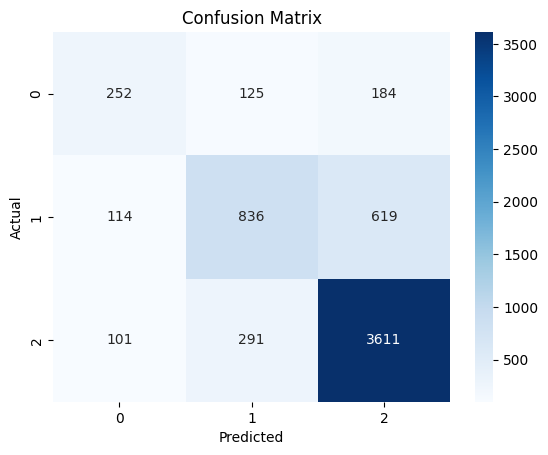

In [ ]:
#hard = 0 , med = 1 , soft = 2
# Make predictions on the validation set
y_val_pred_prob = hyper_model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix using seaborn
labels = np.unique(y_val)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
y_test_pred_prob = hyper_model.predict(X_val)

# Convert predicted probabilities to predicted labels
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(y_val, y_test_pred)
test_precision = precision_score(y_val, y_test_pred, average='macro', zero_division=0)
test_recall = recall_score(y_val, y_test_pred, average='macro')
test_f1 = f1_score(y_val, y_test_pred, average='macro')

# Calculate and print the average evaluation metrics for the test set
print('Average Test Accuracy:', np.mean(test_accuracy))
print('Average Test Precision:', np.mean(test_precision))
print('Average Test Recall:', np.mean(test_recall))
print('Average Test F1 Score:', np.mean(test_f1))

192/192 [==============================] - 0s 1ms/step
Average Test Accuracy: 0.7661829447252568
Average Test Precision: 0.6751416768250603
Average Test Recall: 0.6280315867694842
Average Test F1 Score: 0.6469984744107332
